In [3]:
import torch
from fastai.vision.all import *

In [81]:
import fastai
fastai.__version__

'2.2.7'

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [8]:
training_data = [(path/'training'/str(i)) for i in range(10)]
testing_data = [(path/'testing'/str(i)) for i in range(10)]

In [9]:
training_data

[Path('/root/.fastai/data/mnist_png/training/0'),
 Path('/root/.fastai/data/mnist_png/training/1'),
 Path('/root/.fastai/data/mnist_png/training/2'),
 Path('/root/.fastai/data/mnist_png/training/3'),
 Path('/root/.fastai/data/mnist_png/training/4'),
 Path('/root/.fastai/data/mnist_png/training/5'),
 Path('/root/.fastai/data/mnist_png/training/6'),
 Path('/root/.fastai/data/mnist_png/training/7'),
 Path('/root/.fastai/data/mnist_png/training/8'),
 Path('/root/.fastai/data/mnist_png/training/9')]

In [11]:
fns = get_image_files(training_data[0])
fns

(#5923) [Path('/root/.fastai/data/mnist_png/training/0/15559.png'),Path('/root/.fastai/data/mnist_png/training/0/55745.png'),Path('/root/.fastai/data/mnist_png/training/0/4340.png'),Path('/root/.fastai/data/mnist_png/training/0/26073.png'),Path('/root/.fastai/data/mnist_png/training/0/20548.png'),Path('/root/.fastai/data/mnist_png/training/0/19492.png'),Path('/root/.fastai/data/mnist_png/training/0/31470.png'),Path('/root/.fastai/data/mnist_png/training/0/8323.png'),Path('/root/.fastai/data/mnist_png/training/0/19009.png'),Path('/root/.fastai/data/mnist_png/training/0/11409.png')...]

## Fastai DataBlock Method

In [14]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(valid_pct=0.1, seed=34),
                get_y=parent_label,
                batch_tfms=aug_transforms)

In [19]:
dls = data.dataloaders(training)

TypeError: 'NoneType' object is not iterable

In [17]:
training = path/'train'

In [18]:
training

Path('/root/.fastai/data/mnist_png/train')

In [20]:
dls.train.show_batch()

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'TensorImage'

## Ravis MNIST Semantic SImilarity Baseline

In [79]:
training_tensors = [torch.stack([tensor(Image.open(image)).float()/255 for image in x.ls()]) for x in training_paths]
testing_tensors = [torch.stack([tensor(Image.open(image)).float()/255 for image in test.ls()]) for test in testing_paths]

In [67]:
len(training_tensors), len(testing_tensors)

(10, 10)

In [75]:
training_tensors = [torch.stack([open_image(l).data[0] for l in p.ls()]) for p in training_paths]
testing_tensors = [torch.stack([open_image(l).data[0] for l in p.ls()]) for p in testing_paths]

NameError: name 'open_image' is not defined

In [76]:
mean_tensors = [tr.mean(0) for tr in training_tensors]
# mean_images = [Image(1 - mtr.repeat(3, 1, 1)) for mtr in mean_tensors]
show_all(mean_tensors)

NameError: name 'show_all' is not defined

<AxesSubplot:>

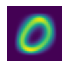

In [77]:
show_image(mean_tensors[0])

In [78]:
show_all?

Object `show_all` not found.


In [61]:
training_tensors = [torch.stack([tensor(Image.open(t))]) for x in training_paths for t in x.ls()]

In [65]:
training_tensors[0].shape

torch.Size([1, 28, 28])

In [94]:
correct = []
total = []

In [95]:
for i in range(10):
    total.append(testing_tensors[i].shape[0])
    preds = torch.Tensor([torch.stack(
        [F.mse_loss(testing_tensors[i][img], mean_tensors[mean_index]).sqrt()
            for mean_index in range(10)
        ]
    ).argmin()
    for img in range (testing_tensors[i].shape[0])
    ])
    correct.append((preds == i).sum())

In [96]:
correct

[tensor(878),
 tensor(1092),
 tensor(781),
 tensor(814),
 tensor(811),
 tensor(612),
 tensor(827),
 tensor(856),
 tensor(718),
 tensor(814)]

In [97]:
total

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [98]:
torch.Tensor(correct).sum(), torch.Tensor(total).sum()

(tensor(8203.), tensor(10000.))

In [99]:
print(f"Accuracy of our baseline model is {100*(torch.Tensor(correct).sum()/torch.Tensor(total).sum())} %")

Accuracy of our baseline model is 82.02999877929688 %


# Reference guide
- https://spapas.github.io/2016/04/27/python-nested-list-comprehensions/
- https://www.geeksforgeeks.org/nested-list-comprehensions-in-python/

In [40]:
training_tensors = [torch.stack([tensor(Image.open(l)) for l in p.ls()]) for p in training_paths]

In [43]:
training_tensors[0].shape

torch.Size([5923, 28, 28])

In [47]:
torch.stack?

Docstring:
stack(tensors, dim=0, *, out=None) -> Tensor

Concatenates a sequence of tensors along a new dimension.

All tensors need to be of the same size.

Arguments:
    tensors (sequence of Tensors): sequence of tensors to concatenate
    dim (int): dimension to insert. Has to be between 0 and the number
        of dimensions of concatenated tensors (inclusive)

Keyword args:
    out (Tensor, optional): the output tensor.
Type:      builtin_function_or_method


In [51]:
non_flat = [ [1,2,3], [4,5,6], [7,8] ]

In [54]:
[y for y in x for x in non_flat]

NameError: name 'x' is not defined

In [55]:
[y for y in x for x in non_flat]

NameError: name 'x' is not defined

In [56]:
[y for x in non_flat for y in x]

[1, 2, 3, 4, 5, 6, 7, 8]